Step 1: Inspect the CSV Files

In [1]:
import pandas as pd

# Define the paths to your CSV files
file_paths = [
    'API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv',
    'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv',
    'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv'
]

# Inspect each file
for file_path in file_paths:
    print(f"Preview of {file_path}:")
    try:
        df = pd.read_csv(file_path, nrows=5)
        print(df.head(), "\n")
    except Exception as e:
        print(f"Error reading {file_path}: {e}\n")


Preview of API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv:
Error reading API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69


Preview of Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_45183.csv:
  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                    

Step 2: Data Cleaning and Transformation

In [2]:
# Read the main data file
df_main = pd.read_csv(file_paths[0], skiprows=4)  # Adjust skiprows based on the file structure

# Reshape the dataframe
df_main = df_main.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                       var_name='Year', value_name='Value')

# Convert Year and Value columns to appropriate data types
df_main['Year'] = pd.to_numeric(df_main['Year'], errors='coerce')  # Convert to numeric, handling errors gracefully
df_main['Value'] = pd.to_numeric(df_main['Value'], errors='coerce')

# Drop rows with NaN or infinite values in 'Year' column
df_main = df_main.dropna(subset=['Year'])

# Convert 'Year' to integer after dropping NaN values
df_main['Year'] = df_main['Year'].astype('Int64')

# Read the country metadata file
df_country_metadata = pd.read_csv(file_paths[1])

# Read the indicator metadata file
df_indicator_metadata = pd.read_csv(file_paths[2])

# Merge main data with country metadata
df = df_main.merge(df_country_metadata, how='left', left_on='Country Code', right_on='Country Code')

# Merge with indicator metadata
df = df.merge(df_indicator_metadata, how='left', left_on='Indicator Code', right_on='INDICATOR_CODE')

# Extract relevant columns (customize based on actual columns in your files)
df = df[['Indicator Name', 'Country Code', 'Year', 'Value', 'Region', 'IncomeGroup']]

# Ensure data types are correct
df['Value'] = df['Value'].astype(float)


Step 3: Exploratory Data Analysis (EDA)

In [3]:
# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'), "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Count of unique countries and indicators
print("Unique Countries and Indicators:")
print(f"Countries: {df['Country Code'].nunique()}, Indicators: {df['Indicator Name'].nunique()}", "\n")

# Distribution of values by Region and IncomeGroup
print("Value Distribution by Region and Income Group:")
print(df.groupby(['Region', 'IncomeGroup'])['Value'].describe(), "\n")


Summary Statistics:
           Indicator Name Country Code       Year         Value  \
count               17024        17024    17024.0  1.666500e+04   
unique                  1          266       <NA>           NaN   
top     Population, total          ABW       <NA>           NaN   
freq                17024           64       <NA>           NaN   
mean                  NaN          NaN     1991.5  2.159737e+08   
std                   NaN          NaN  18.473496  7.102653e+08   
min                   NaN          NaN     1960.0  2.646000e+03   
25%                   NaN          NaN    1975.75  9.940000e+05   
50%                   NaN          NaN     1991.5  6.787419e+06   
75%                   NaN          NaN    2007.25  4.641603e+07   
max                   NaN          NaN     2023.0  7.950947e+09   

                       Region  IncomeGroup  
count                   13888        13824  
unique                      7            4  
top     Europe & Central Asia  High inco

Step 4: Advanced Visualizations

Distribution of Indicators by Country with Seaborn

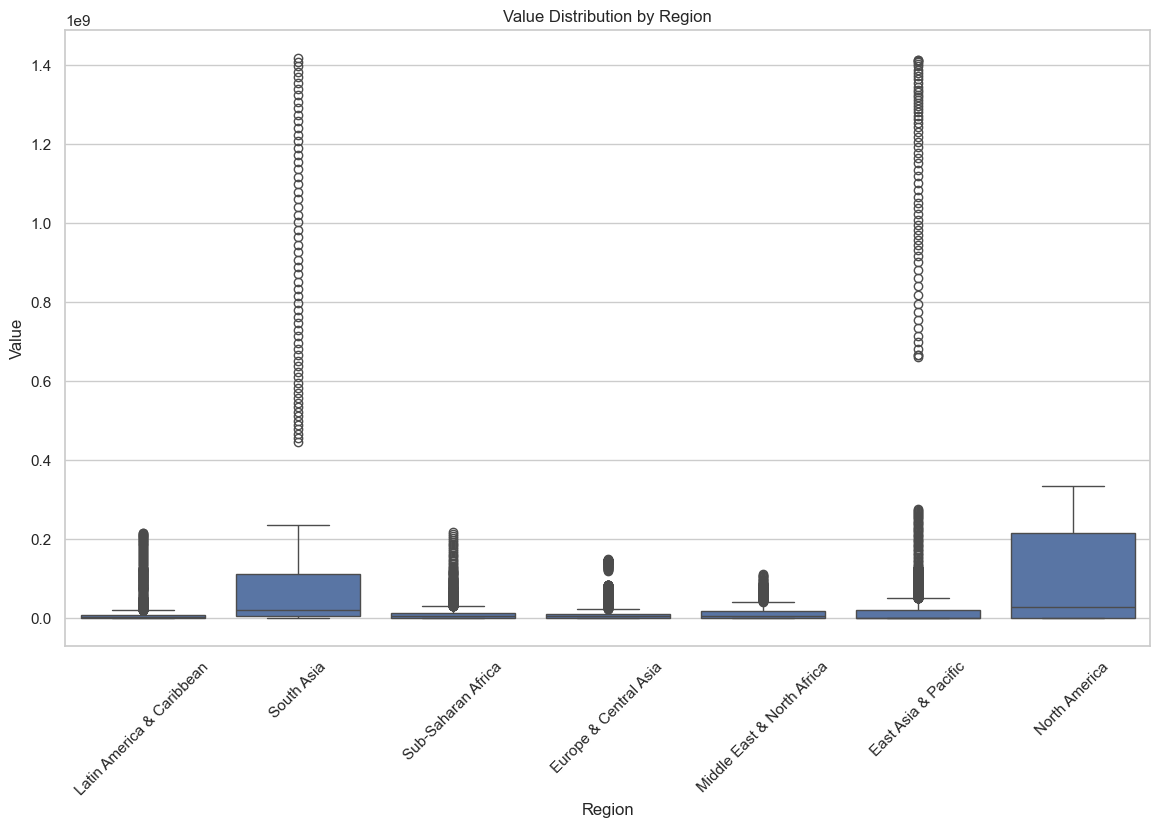

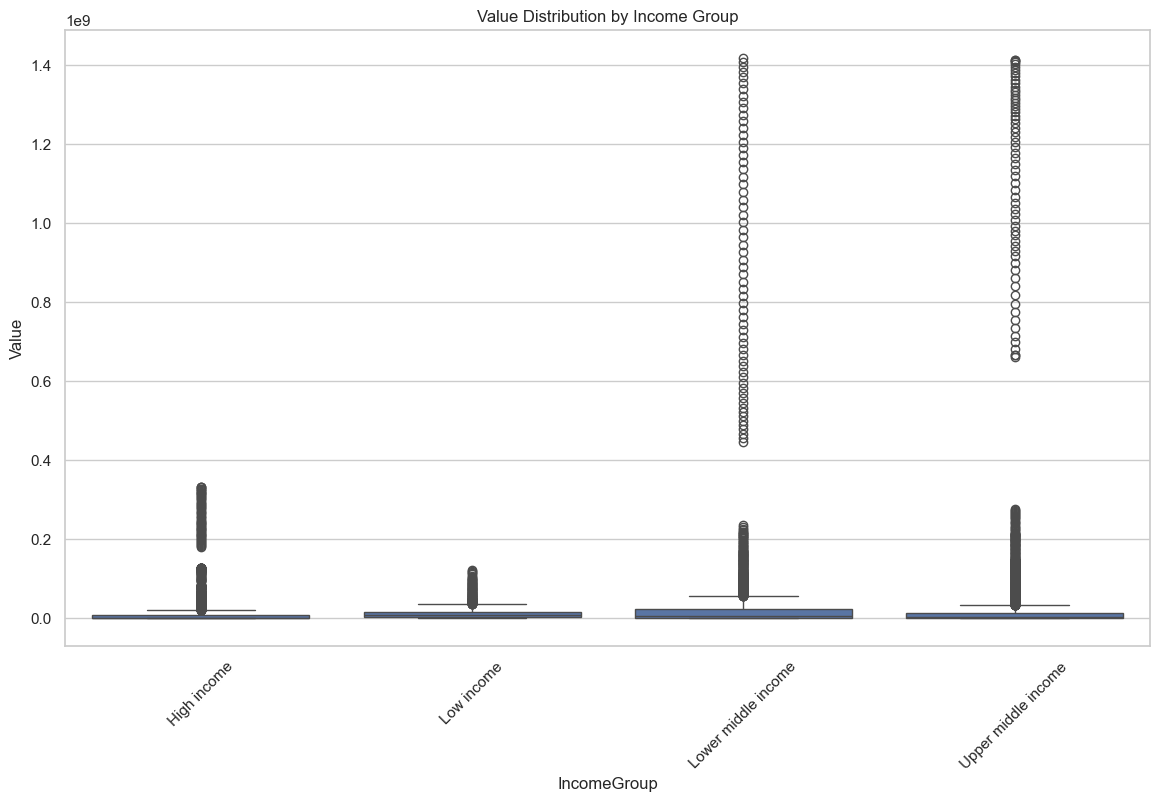

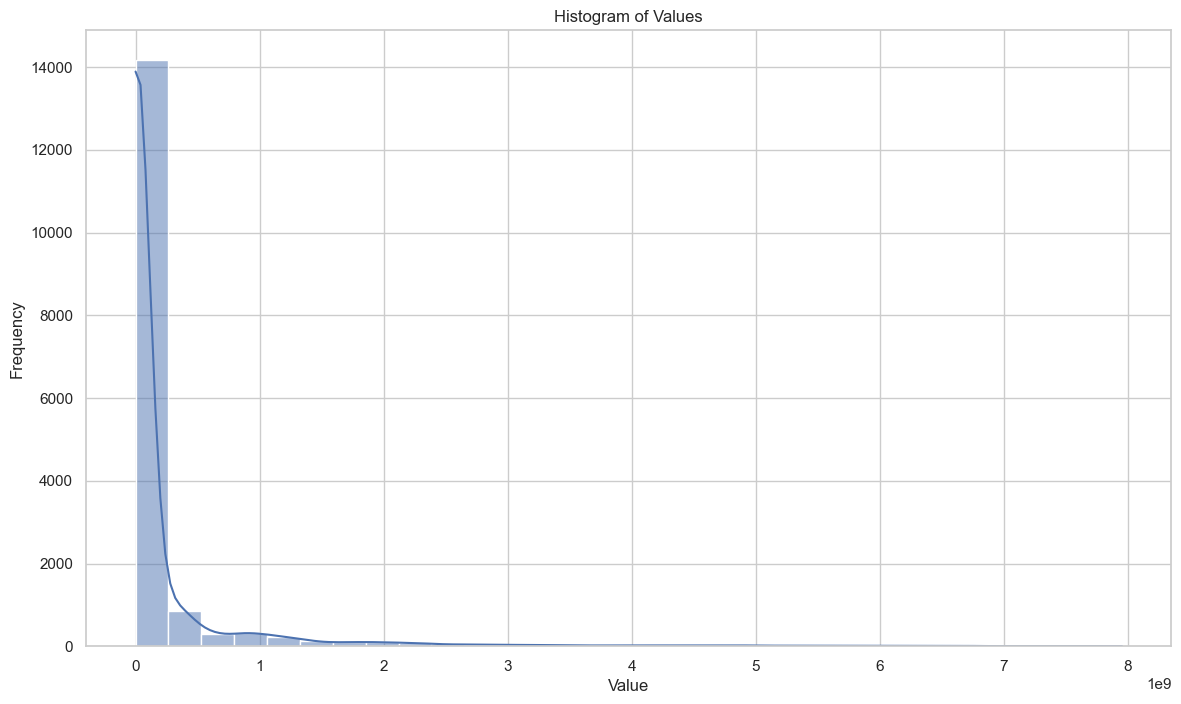

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme
sns.set_theme(style="whitegrid")

# Plot distribution of values by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Region', y='Value')
plt.title('Value Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of values by income group
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='IncomeGroup', y='Value')
plt.title('Value Distribution by Income Group')
plt.xticks(rotation=45)
plt.show()

# Plot histogram of values
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Value', bins=30, kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
